<center><h1> Projeto 2 - Ciência dos Dados</h1><center>

## Insper Instituto de Ensino e Pesquisa

<center><h5>Autores:
</h5></center>

<center><h5>Nome: Arthur Motta Gomes
</h5></center>

<center><h5>Nome: Enzo Dadier Lacks Zamberlan
</h5></center>

<center><h5>Nome: Guilherme Fugita
</h5></center>


**Professora Orientadora:**

Maria Kelly Venezuela 

## Contextualização

------------------------------------------------------------

<div id="context"></div>

   As brincadeiras típicas da infância como, por exemplo, pular cordas, queimadas e pique-pegas estão, lamentavelmente, sendo reduzidas das vidas dos jovens na atualidade. Entretanto, os jogos eletrônicos estão a cada vez mais presentes, segundo o estudo do Pew Internet & American Life Project, em 2015, nos Estados Unidos, 80% dos jovens entre 10 e 17 anos jogavam videogames diariamente.
   
   O fascínio pela tecnologia, que sempre surpreende com novidades, é uma das causas pelas quais os jovens são tão vidrados nos jogos eletrônicos. Ademais, o pais ,geralmente, incentivam esses jogos por preferirem que os filhos fiquem em casa devido à violência das ruas. Dessa forma, é comum que crianças e adolescentes passem horas vidrados nos computadores e celulares. Além disso, os jogos via internet permitem que passem o dia inteiro em contato com seus colegas, já que nem todos têm a oportunidade de saírem de casa para se encontrarem. E o sedentarismo também é uma das causas da preferência de jogos onlines a jogos que necessitem de movimentos físicos.
    
   Os efeitos causados pelos jogos eletrônicos podem ser bastante positivos quando esses são usados moderadamente. Um deles é o fato de esses tipo de jogo desenvolver habilidades como, por exemplo, a destreza, a percepção e  induzir o raciocínio lógico. 
   
   **Nesse sentido, o objetivo desse projeto é classificar e tentar prever, atraves das características dos games ao longo dos anos (plataforma , data de lancamento, meta score, entre outros), se determinado jogo será aceito e fará sucesso futuramente, prevendo a sua plataforma de publicação e nota.**

### Entendendo a base de dados utilizada
<div id="Base"></div>

* `name`: Nome do Jogo;


* `platform`: Plataforma em que o jogo foi lançado, de consoles à computador;


* `release_date	`: Data de lançamento do jogo; 


* `summary`: Um breve resumo do jogo e sua história;
     

* `meta_score (Target)`: Uma média das notas dadas pelos críticos de jogos indo de 00 à 100;


* `user_review`: Uma média das notas dadas pelos usuários indo de 0 à 10.



## Bibliotecas

------------------------------------------------------------

<div id="bibliotecas"></div>

_Rode a célula centralizar e melhorar a visibilidade do Notebook_

In [1]:
# Possibilitando escrever no Markdown através de código.
from IPython.display import Markdown as md

#Ajeitando gráficos para ficarem centralizados
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
#Ignorando avisos de limite
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Bibliotecas essenciais

# Bibliotecas essenciais

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm, probplot
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math
import time
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Modelo KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# Modelo Logistic Regression
from sklearn.linear_model import LogisticRegression

#Validação cruzada
from sklearn.model_selection import cross_val_score

#Inteiração
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Carregando Base de Dados

---------------------------------------------------------------

<div id="carregando"></div>

In [4]:
filename = 'all_games.csv'

In [5]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Enzo Z\Backup Lenovo\CIÊNCIA_DE_DADOS\Proj_2_certo\esse\Projeto_2_CDADOS


In [6]:
dataset = pd.read_csv(filename)
dataset.head(5)

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [7]:
#Informações gerais sobre a base de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


# Verificando o tamanho do DATASET:

Aqui verificaremos o tamanho do dataset, ainda sem descontar suas linhas que possuem valores nulos e sem valores.

In [8]:
dataset.shape

(18800, 6)

# Para verificar valores nulos:

Utilizaremos o .insull() para verificar se há valores nulos no nosso dataset, sendo assim faremos a somas desses valores nulos pelo código .sum(). Com isso nós iremos transformar os valores nulos em "NaN", ou seja, *"Not a Number"*, para logo em seguida eliminá-los criando enfim um dataset limpo e sem valores nulos.

In [9]:
dataset.isnull().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

In [10]:
nan_value = float("NaN")
data_clean = dataset
data_clean.replace("", nan_value, inplace=True)
# data_clean.summary = data_clean.summary.fillna('SEM RESUMO', inplace=True)
data_clean.summary = data_clean.summary.replace(np.nan, 'SEM RESUMO', regex=True)

# data_clean.dropna(inplace=True)

In [11]:
data_clean.isnull().sum()

name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64

In [12]:
data_clean.shape

(18800, 6)

# Identificando a categoria de cada elemento utilizado e transformando-os caso necessário:

In [13]:
data_clean.dtypes

name            object
platform        object
release_date    object
summary         object
meta_score       int64
user_review     object
dtype: object

In [14]:
data_clean.user_review = pd.to_numeric(data_clean.user_review, errors='coerce').fillna(0).astype(np.float)

In [15]:
data_clean.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score        int64
user_review     float64
dtype: object

# A partir desse momento iniciaremos nossa análise exploratória do problema apresentado pelo grupo:

-------------------------------------------------------------


Tendo em vista o anseio por saber qual será a plataforma de publicação do próximo jogo de sucesso e sua respectiva nota atribuída, vamos à seguinte exploração de dados:

In [16]:
dados_meta_score = data_clean.drop(['name','platform','release_date','summary','user_review'], axis=1)
dados_meta_score.describe().round(3)

,meta_score
count,18800.000
mean,70.649
std,12.225
min,20.000
25%,64.000
50%,72.000
75%,80.000
max,99.000


In [17]:
dados_user_review = data_clean.drop(['name','platform','release_date','summary','meta_score'], axis=1)
dados_user_review.describe().round(3)

,user_review
count,18800.000
mean,6.483
std,2.233
min,0.000
25%,6.000
50%,7.200
75%,7.900
max,9.700


_Observe que aqui teremos todos os consoles e videogames envolvidos no nosso pdSeries_

In [18]:
data_clean.drop(['name','release_date','summary','user_review','meta_score'], axis=1).groupby(data_clean.platform).describe().round(3)

platform                                
                     count unique                top  freq
platform                                                  
 3DS                   396      1                3DS   396
 DS                    720      1                 DS   720
 Dreamcast             125      1          Dreamcast   125
 Game Boy Advance      438      1   Game Boy Advance   438
 GameCube              448      1           GameCube   448
 Nintendo 64            71      1        Nintendo 64    71
 PC                   4864      1                 PC  4864
 PSP                   512      1                PSP   512
 PlayStation           187      1        PlayStation   187
 PlayStation 2        1414      1      PlayStation 2  1414
 PlayStation 3        1256      1      PlayStation 3  1256
 PlayStation 4        2056      1      PlayStation 4  2056
 PlayStation 5         124      1      PlayStation 5   124
 PlayStation Vita      257      1   PlayStation Vita   257
 Stadia                  5      1             Stadia     5
 Switch               1399      1             Switch  1399
 Wii                   655      1                Wii   655
 Wii U                 184      1              Wii U   184
 Xbox                  789      1               Xbox   789
 Xbox 360             1644      1           Xbox 360  1644
 Xbox One             1179      1           Xbox One  1179
 Xbox Series X          77      1      Xbox Series X    77

# Para facilitar a compreensão do projeto vamos juntar os respectivos equipamentos com suas empresas de origem!

Para isso adicionamos os respectvios aparelhos à sua empresa de origem. Vale notar aqui que todos os nomes no pdSeries possuem um espaço antes de começarem (e que o Game Boy Advance possui uma quebra de parágrafo), fato que foi adicionado aos respectivos nomes também.

In [19]:
data_clean.platform[0] == ' Nintendo 64' # Valida a entrada dos nomes 

True

In [20]:
data_clean.platform[53] == ' Game Boy Advance' # Valida a entrada dos nomes 

True

In [21]:
empresa = []
lista_nintendo = [' 3DS',' DS',' Dreamcast',' Game Boy Advance',' GameCube',' Nintendo 64',' Switch',' Wii',' Wii U']
lista_playstation = [' PSP', ' PlayStation',' PlayStation 2',' PlayStation 3',' PlayStation 4',' PlayStation 5',' PlayStation Vita' ]
lista_pc = [' PC',' Stadia']
lista_xbox = [' Xbox', ' Xbox 360', ' Xbox One', ' Xbox Series X']
for s in data_clean.platform:
    if s in lista_nintendo:
        empresa.append('Nintendo')
    if s in lista_playstation:
        empresa.append('PlayStation')
    if s in lista_pc:
        empresa.append('PC')
    if s in lista_xbox:
        empresa.append('Xbox')
#     if s not in lista_nintendo and s not in lista_playstation and s not in lista_pc and s not in lista_xbox: 
#         empresa.append('oq?')
    
        
data_clean['empresa'] = empresa

data_clean

,name,platform,release_date,summary,meta_score,user_review,empresa
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox
...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3,Xbox
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7,Xbox
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9,PlayStation
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7,PC


In [22]:
data_clean.drop(['name','release_date','summary','user_review','meta_score','platform'], axis=1).groupby(data_clean.empresa).describe().round(3)

empresa                          
              count unique          top  freq
empresa                                      
Nintendo       4436      1     Nintendo  4436
PC             4869      1           PC  4869
PlayStation    5806      1  PlayStation  5806
Xbox           3689      1         Xbox  3689

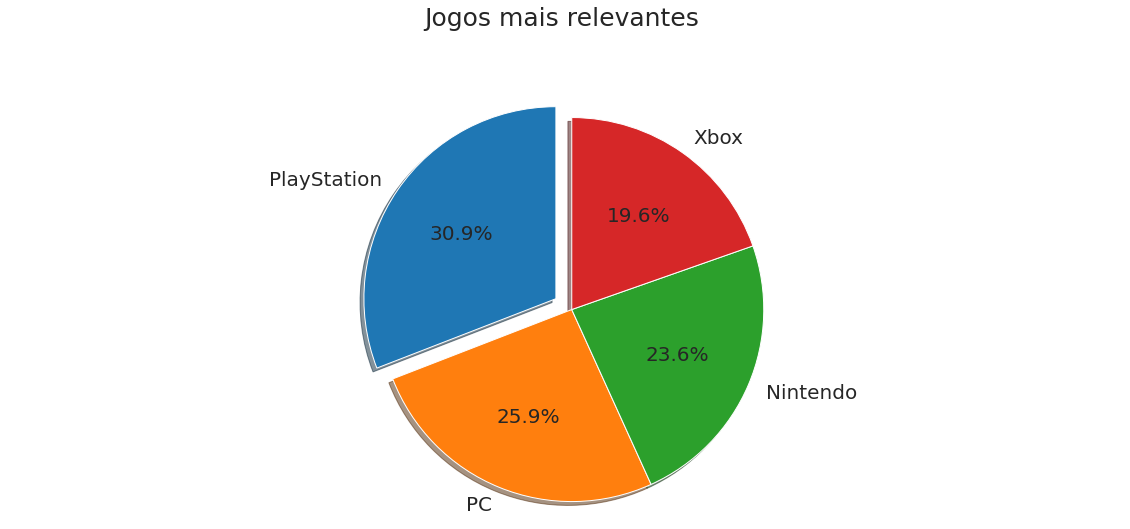

In [23]:
# Setando cores de fundo - gráficos
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.title('Jogos mais relevantes \n\n',size=25)
plt.pie(data_clean.empresa.value_counts(),labels=data_clean.empresa.value_counts().index,
        explode= [0.1,0,0,0],autopct='%1.1f%%',shadow=True, startangle=90,
       textprops={'size':20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.style.use('default')
plt.show()

# Criando um modelo primário (teste e impróprio) que prevê a nota dada por um certo meta score, a partir das avaliações feitas pelos usuários:

In [24]:
x_dados = data_clean['user_review']*10 # Definindo user_review como explicativa e multiplicando por 10 para equiparar as casas
# decimais.
y_dados = data_clean['meta_score']  # Definindo meta_score como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

In [25]:
# Define o modelo
model = sm.OLS(y_dados, X_dados)    

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meta_score   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     4166.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:41:06   Log-Likelihood:                -71859.
No. Observations:               18800   AIC:                         1.437e+05
Df Residuals:                   18798   BIC:                         1.437e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.5293      0.248    224.130      0.000      55.044      56.015
user_review     0.2332      0.004     64.543      0.000       0.226       0.240
==============================================================================
Omnibus:                     1285.840   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1581.545
Skew:                          -0.666   Prob(JB):                         0.00
Kurtosis:                       3.495   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**AGORA USE A SAIDA do OLS Regression Results**

Como resultado do `statsmodels.OLS` obtivemos a tabela acima, com informações de $\hat\beta_0$ (intercepto: `const`) e $\hat\beta_1$ (inclinação da reta: `2010_income`). Esses valores podem ser encontrados na coluna `coef` do *output* do OLS Regression Results.

In [26]:
beta0 = results.params['const']
beta1 = results.params['user_review']

print("Estimativa de beta0 (coeficente linear): {0}".format(beta0))
print("Estimativa de beta1 (coeficente angular): {0}".format(beta1))

Estimativa de beta0 (coeficente linear): 55.52933069970196
Estimativa de beta1 (coeficente angular): 0.23320888543303606


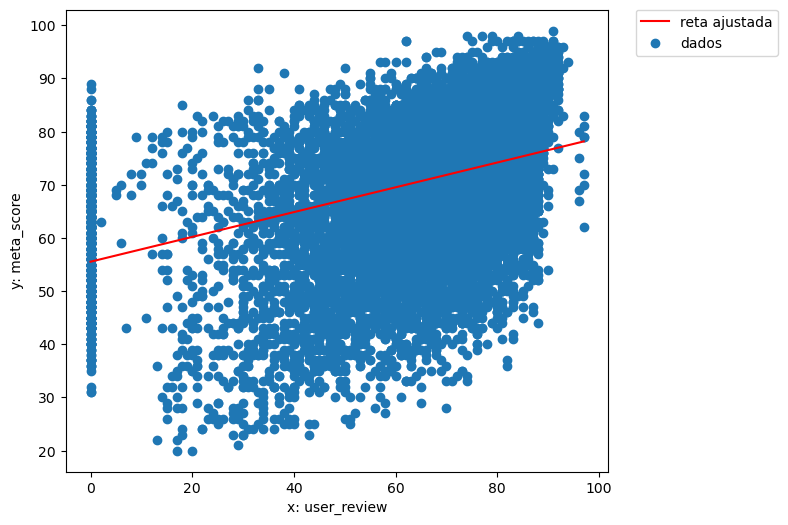

In [27]:
x_vec = np.linspace(x_dados.min(), x_dados.max(), 100000)
y_vec = beta0 + beta1*x_vec

plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados); # dados
plt.xlabel("x: user_review")
plt.ylabel("y: meta_score")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

# Agora vamos criar um novo modelo, adicionando os anos de lançamento como parâmetro de comparação entre os jogos lançados:

Primeiro vamos identificar o ano obtido em `release_date`:

In [28]:
data_clean.release_date[834].split(',')[1].strip() # Valida se a data é retirada

'2017'

Vamos identificar o tamanho dessa coluna:

In [29]:
range(len(data_clean.release_date))

range(0, 18800)

Agora adicionaremo seus respectivos anos a uma lista, para posteriormente adicioná-la ao `DataFrame`:

In [30]:
anos = []

for s in range(len(data_clean.release_date)):
    anos.append (data_clean.release_date[s].split(',')[1].strip())
        

In [31]:
data_clean.head(834)

,name,platform,release_date,summary,meta_score,user_review,empresa
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox
...,...,...,...,...,...,...,...
829,XCOM 2,PC,"February 5, 2016",20 years have passed since world leaders uncon...,88,7.3,PC
830,Dishonored 2,PlayStation 4,"November 10, 2016","Dishonored 2 takes your protagonist, Corvo Att...",88,8.0,PlayStation
831,Tony Hawk's Pro Skater 1 + 2,Xbox One,"September 4, 2020",Drop back in with the most iconic skateboardin...,88,7.9,Xbox
832,What Remains of Edith Finch,Switch,"July 4, 2019",What Remains of Edith Finch is a collection of...,88,7.8,Nintendo


In [32]:
data_clean

,name,platform,release_date,summary,meta_score,user_review,empresa
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox
...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3,Xbox
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7,Xbox
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9,PlayStation
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7,PC


In [33]:
data_clean['ano'] = anos
data_clean

,name,platform,release_date,summary,meta_score,user_review,empresa,ano
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo,1998
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation,2008
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo,1999
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox,2008
...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3,Xbox,2013
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7,Xbox,2003
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9,PlayStation,2015
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7,PC,2012


Vamos verificar o tipo de categoria dada ao `ano` e caso necessário vamos mudá-la:

In [34]:
data_clean.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score        int64
user_review     float64
empresa          object
ano              object
dtype: object

In [35]:
data_clean.ano = pd.to_numeric(data_clean.ano, errors='coerce').fillna(0).astype(np.int64)

In [36]:
data_clean.dtypes

name             object
platform         object
release_date     object
summary          object
meta_score        int64
user_review     float64
empresa          object
ano               int64
dtype: object

In [37]:
data_clean

,name,platform,release_date,summary,meta_score,user_review,empresa,ano
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,Nintendo,1998
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,PlayStation,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,PlayStation,2008
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,Nintendo,1999
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,Xbox,2008
...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3,Xbox,2013
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7,Xbox,2003
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9,PlayStation,2015
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7,PC,2012


#  Para podermos fazer uma análise exploratória mais profunda e completa, projetaremos gráficos em função dos anos para as notas dadas aos jogos!

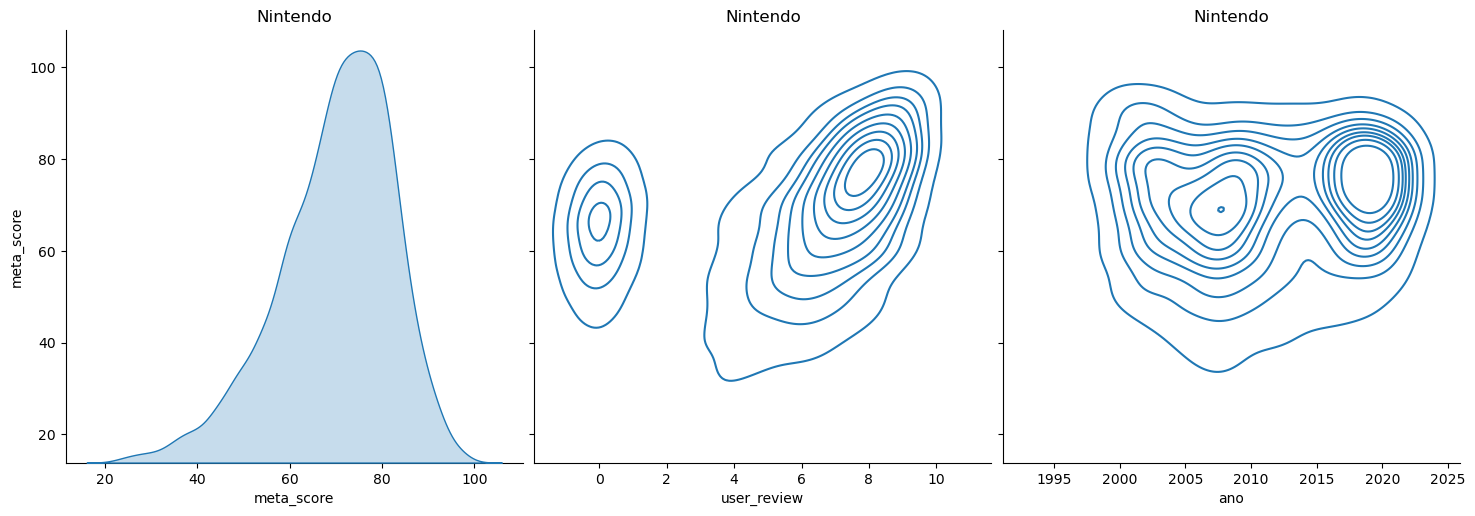

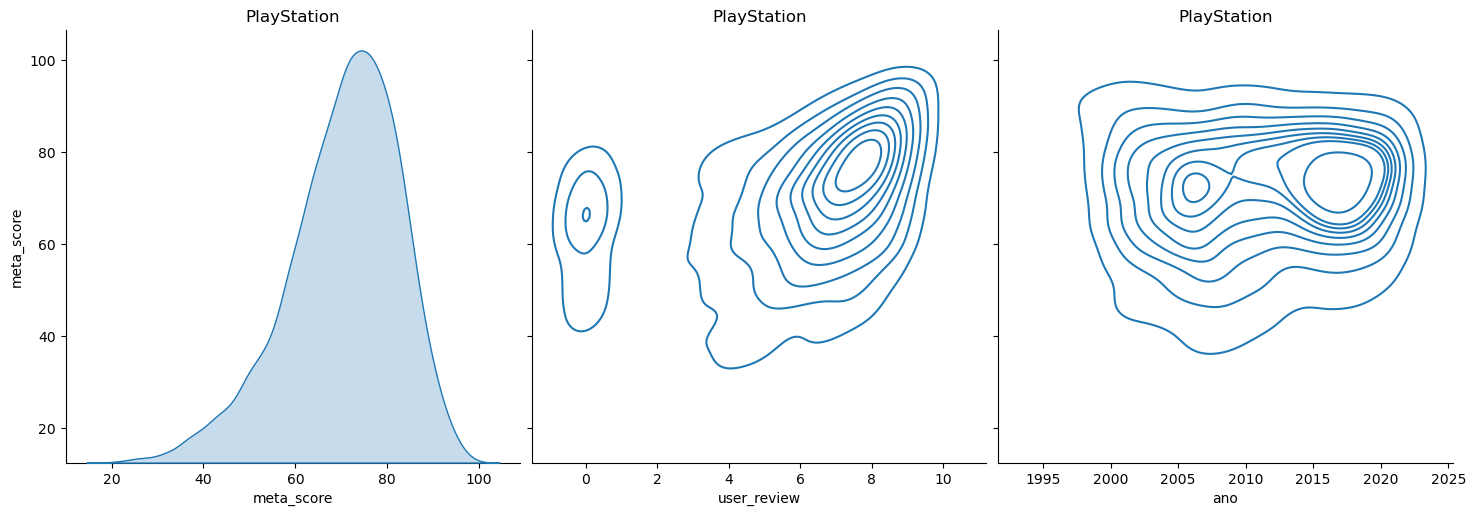

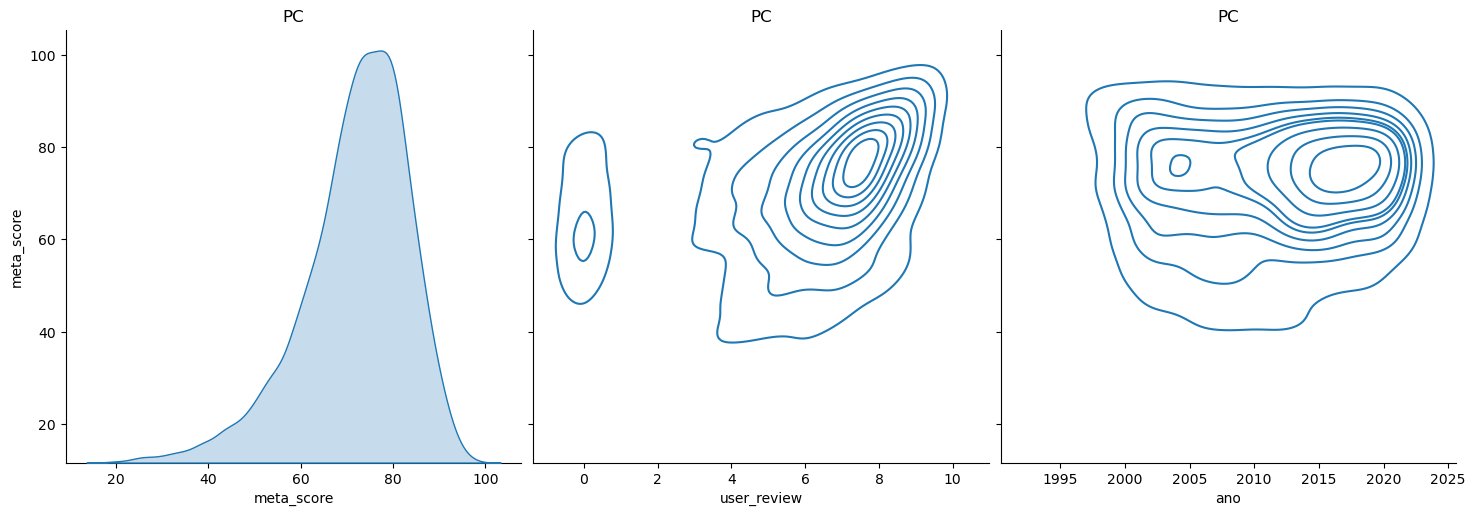

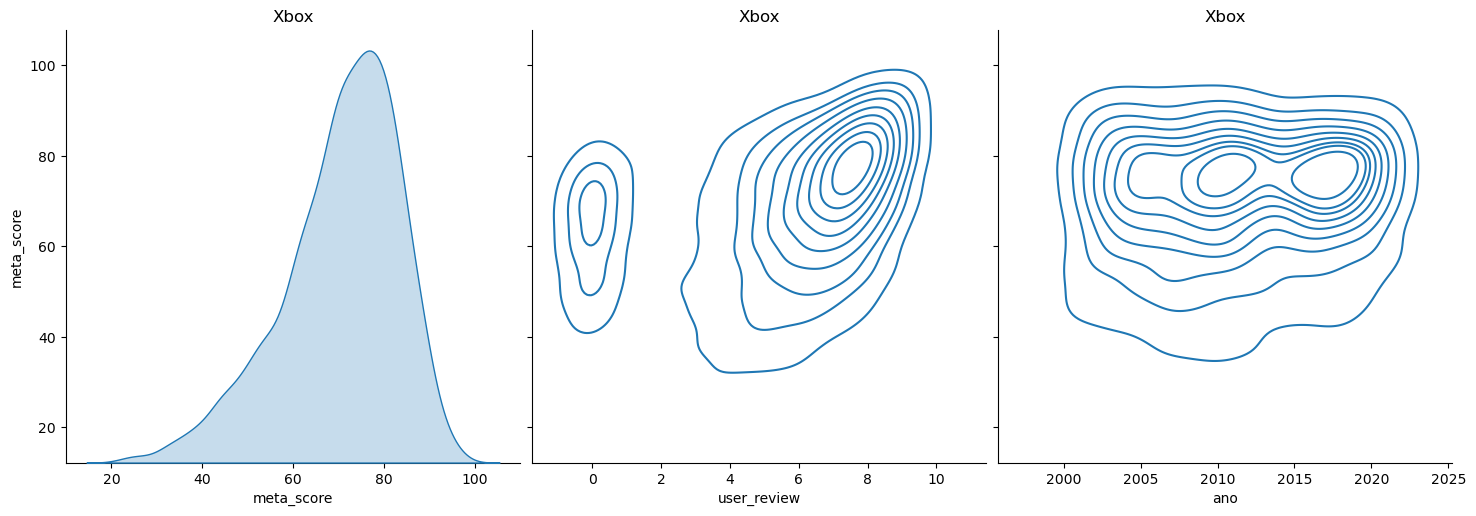

In [38]:
# plt.subplot(411)
sns.pairplot(data=data_clean[data_clean.empresa=='Nintendo'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='Nintendo')

# plt.subplot(412)
# plt.title("PlayStation")
sns.pairplot(data=data_clean[data_clean.empresa=='PlayStation'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='PlayStation')

# plt.subplot(413)
# plt.title("PC")
sns.pairplot(data=data_clean[data_clean.empresa=='PC'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='PC')

# plt.subplot(414)
# plt.title("Xbox")
sns.pairplot(data=data_clean[data_clean.empresa=='Xbox'],
                  x_vars=['meta_score','user_review', 'ano' ],
                  y_vars=['meta_score'] , height=5 , kind="kde").set(title='Xbox')



## Concluindo Analise Exploratória

<div id="conclusao1"></div> 

Conforme retiramos das analises gráficas e analíticas feitas , é valido sintetizar alguns pontos chaves , para melhor entendimento da base de dados e da pergunta que queremos responder.

**A base de dados está limpa e não possui valores nulos, ou algum dado fora dos conformes (Outliers notórios) , como por exemplo bytes negativos ou uma porta sem identificação numérica.**

Fora averiguado também que a maior parte dos dados numéricos, teve comportamento modelado por uma distribuição estatística do tipo **Exponencial**,sendo esta  uma distribuição que se caracteriza por ter uma função de taxa de falha constante. A distribuição exponencial é a única com esta propriedade. Ela é considerada uma das mais simples em termos matemáticos, mostrando também uma clara assimetria em alguns desses dados armazenados, representando sobretudo a maior concentração de dados nos expoentes até a centena.

Dessa maneira segmentou-se os fatores mais importantes de acordo com os protocolos de ação do Firewall:

* **Allow (Permissão de conexão Client-Server):**

    `Source Port Client`: Notou-se um grande número de portas no intervalo das portas consideradas de interface Web, isto é as portas disponíveis a Browsers ou desenvolvedores, demonstrando assim, que um Software de detecção de Malware, deve estar sujeito principalmente a permissão de tráfego.
    
    `Destination Port Client`: As ações liberadas por protocolo, se restringiram praticamente as portas 53, 80 e 443, estas sendo Well-Known Ports, o que justifica o fato de estas ações passarem pelo crivo de portas registradas e conhecidas pelo sistema.
    
    `Source Port NAT`: Quase não houveram ações de permissão destinadas a esse protocolo, muito por conta da tradução do endereço de rede não se aplicar, em muitos casos, a portas de desenvolvedores.
    
    `Destination Port NAT`: As ações liberadas por protocolo, se restringiram praticamente as portas 53, 80 e 443, estas sendo Well-Known Ports, o que justifica o fato de estas ações passarem pelo crivo de portas registradas e conhecidas pelo sistema, muito parecido com o protocolo realizado pela inteiração Cliente.
    
    `Bytes`: Retomando a analise feita [aqui](#Numerico) , fora observado que a maior parte dos Bytes trafegados, mais concentrados principalmente nos Recebidos, foram do domínio do protocolo de permissão, o que se justifica, devido o não impedimento de conexão realizado pelo Firewall, permitindo o tráfego dos dados entre Client e Server.
    `Packets`: Análise análoga a feita para Bytes, visto que Packets consiste, em basicamente o "empilhamento" de bytes trafegados de maneiras simultaneamente pelo endereço de rede.
    `Tempo decorrido`: Como mais Bytes e Packets foram realizados por esse protocolo, o tempo de duração de uma análise por vezes foi maior, visando sobretudo a verificação da conexão.
    
    
* **Deny (Negação de conexão Client-Server):**

    `Source Port Client`: Notou-se um grande número de portas no intervalo das portas consideradas de interface Web, isto é as portas disponíveis a Browsers ou desenvolvedores, com demonstração principal de que possíveis ameaças podem estar localizadas em portas não conhecidas ou registradas, e sim na parte aberta a desenvolvedores Web.
    
    `Destination Port Client`: As ações de Deny, foram quase que exclusivas e bem divididas nas portas de open Source a Desenvolvedores, seguindo à métrica dessas portas conforme descrito.
    
    `Source Port NAT`: Como as maiorias das ações tomadas nesse endereço foram majoritariamente na porta 0, e dentre essas, a ação de deny foi a mais proeminente, mostrando um possível padrão observável nesse certame.
    
    `Destination Port NAT`: Fora observado para o protocolo Deny na porta de destinação de endereço de rede, a porta mais notória nesse sentido, foi  novamente a porta de número 0, indicando um protocolo universal para tais ações sobre este protocolo.
    
    `Bytes`: Averiguou-se que devido a natureza deste protocolo, a maioria dos Bytes em tráfego foram aqueles que foram enviados, devido que ao bloqueio realizado pelo software, devido a detecção de Malware.
    
    `Packets`: Análise análoga a feita para Bytes, visto que Packets consiste em um conglomerado de bytes e estando restrito a esse sentido.
    
    `Tempo decorrido`: O tempo decorrido foi praticamente padronizado para ações que não a de "Allow", devido a tomada de decisão mais rápida do software após detecção de Malware.
    
* **Drop (Desligamento simultâneo de interface Client-Server)**:

    `Source Port Client`: Quase não observou-se este protocolo na inteiração Cliente-Server, demonstrando a possibilidade de ativação deste em casos mais específicos de envio de dados do Servidor para o cliente e não o contrário.
    
    `Destination Port Client`: Tem proeminência na porta 445 de destinação, ressaltando que possivelmente ações danosas podem estar associadas a essa porta e sendo esta responsável pela maioria dos casos de desligamento simultâneo.
    
    `Source Port NAT`: Teve a maioria das ações tomadas pela porta 0, quase que como ação protocolar, deixando dessa forma, a ação de Drop como a segunda mais comum nessa porta.
    
    `Destination Port NAT`: Fora repetido o comportamento observado no protocolo anterior, sendo a ação de Drop a segunda mais comum  na porta 0, a mais proeminente em ocorrências nesse âmbito.
    
    `Bytes`: Averiguou-se que devido a natureza deste protocolo, a maioria dos Bytes em tráfego foram aqueles que foram enviados, devido que ao bloqueio realizado pelo software, devido a detecção de Malware.
    
    `Packets`: Análise análoga a feita para Bytes, visto que Packets consiste em um conglomerado de bytes e estando restrito a esse sentido.
    
    `Tempo decorrido`: O tempo decorrido foi praticamente padronizado para ações que não a de "Allow", devido a tomada de decisão mais rápida do software após detecção de Malware.

* **Reset-Both (Resetar simultâneamente a interface) :**

     Não foram Observados dados suficientes para mapeamento do comportamento dos features em função dessa ação, devido a sua pequena ocorrência no Dataset.
        
Esses fatos observados nos features numéricos, reforçam a necessidade de uma normaliazção de valores utilizada , logarítimica.

Seguimentando esses dados pela ação tomada , observou-se que os protocolos drop , denny e reset-both , os dados enviados bytes/packets foram feitos de maneira quase que unidirecional (Interface Client-Server), visto que o Firewall barrou o recebimento de dados dessa porta, corraborando para sua função de proteção do sistema.

Por outro lado , assim como esperado , aqueles que receberam protocolo allow tiveram recebimento e envio de dados de maneira bidirecional, devido a permissão do Firewall. Como esperado , as operações no protocolo Allow , demoraram mais tempo do que nas outras ações , devido a troca de dados realizada.

# Tendo em vista o nosso objetivo de previsão, agora, vamos embaralhar o dataset a fim de possuir valores de teste e valores de comparção para uso futuro!

Analisando os tipos de dados contidos em nosso dataset, observamos que para o modelo preditivo alguns valores enquadram-se na característica de uma dados categórico. Para relembrar:

* `Dados qualitativos ou categóricos` são aqueles  e ao serem transformados em valores numéricos não possuem uma lógica ou sentido agregado. Por exmeplo as cores dos olhos, não dizemos que a cor de olho castanho é maior que a cor de olhos azul.  

* `Dados quantitativos ou numericos` são aqueles que de certa forma impõem ordem. Por exemplo a idade ou altura de uma pessoa.

Dito isto , vamos analisar novamente os tipos de dados contidos em nossa base de dados:

`Vamos embaralhar o dataset para dividi-lo em duas frentes, mas claro pensando em seu nível de relevância e probabilidade, por isso utilizaremos a biblioteca sk.learning para facilitar o processo`:

In [39]:
train, test = train_test_split(
...     data_clean, test_size=0.2, random_state=42)

train

,name,platform,release_date,summary,meta_score,user_review,empresa,ano
17616,Monster 4x4: Masters of Metal,PC,"December 10, 2003",Get ready to pilot the world's most powerful t...,49,0.0,PC,2003
15153,J-Stars Victory Vs+,PlayStation 4,"June 30, 2015",J-STARS Victory Vs+ invites fans and gamers to...,61,6.4,PlayStation,2015
10628,Fractured Soul,3DS,"September 13, 2012","In Fractured Soul 3D, players take on the role...",70,7.5,Nintendo,2012
1123,Dead Space 2,PC,"January 25, 2011",Hero Isaac Clarke returns for another heart-po...,87,8.4,PC,2011
14673,Kao the Kangaroo Round 2,Xbox,"March 21, 2006",Kao the kangaroo is on the run - he has to sto...,62,0.0,Xbox,2006
...,...,...,...,...,...,...,...,...
11284,Herdy Gerdy,PlayStation 2,"March 4, 2002","Gerdy, an apprentice herder, embarks on an epi...",69,5.5,PlayStation,2002
11964,Mega Man Battle Network 4 Red Sun,Game Boy Advance,"June 29, 2004",The fourth installment in the Mega Man Battle ...,68,8.7,Nintendo,2004
5390,inFamous: Festival of Blood,PlayStation 3,"October 25, 2011","Vampires swarm New Marais, and revered superhe...",78,8.1,PlayStation,2011
860,Deathloop,PlayStation 5,"September 14, 2021","If at first you don't succeed Die, Die Again. ...",88,6.4,PlayStation,2021


In [40]:
test

,name,platform,release_date,summary,meta_score,user_review,empresa,ano
13755,Rogue Ops,GameCube,"October 29, 2003",After receiving two years of grueling instruct...,65,0.0,Nintendo,2003
13306,Citizens of Earth,PC,"January 20, 2015",In Citizens of Earth take on the role of the v...,66,6.5,PC,2015
10098,Zone of the Enders: The 2nd Runner MARS,PlayStation 4,"September 4, 2018","JEHUTY lives. And there, ANUBIS thrives. Zone ...",71,7.8,PlayStation,2018
6879,Second Sight,PlayStation 2,"September 21, 2004","Combining an atmospheric, psychological thrill...",76,7.9,PlayStation,2004
13862,Need for Speed: The Run,PlayStation 3,"November 15, 2011",Need for Speed The Run lures players into an u...,64,6.4,PlayStation,2011
...,...,...,...,...,...,...,...,...
7530,Deemo Reborn,PlayStation 4,"November 21, 2019",Rayark’s classic game Deemo is reborn on the P...,75,7.6,PlayStation,2019
9786,Rogue Aces,PlayStation 4,"April 12, 2018",Join the Rogue Aces and liberate the islands f...,72,4.6,PlayStation,2018
2471,WHAT THE GOLF?,PC,"September 19, 2019",The golf game for people who hate golf! A sill...,83,7.9,PC,2019
15736,GRIP: Combat Racing,Switch,"November 6, 2018","GRIP is a high octane, hardcore combat racer, ...",59,6.1,Nintendo,2018


`Dividindo o dataset em duas partes, uma de teste e uma de validação`:

In [41]:
print("Shape of new dataframes - {} , {}".format(train.shape, test.shape))

Shape of new dataframes - (15040, 8) , (3760, 8)


# Para uma análise com mais variáveis consideradas, vamos à uma regressão múltipla!

In [42]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [43]:
data_clean_dummies = pd.get_dummies(train, columns=['empresa'])

In [44]:
data_clean_dummies.head(20)

,name,platform,release_date,summary,meta_score,user_review,ano,empresa_Nintendo,empresa_PC,empresa_PlayStation,empresa_Xbox
17616,Monster 4x4: Masters of Metal,PC,"December 10, 2003",Get ready to pilot the world's most powerful t...,49,0.0,2003,0,1,0,0
15153,J-Stars Victory Vs+,PlayStation 4,"June 30, 2015",J-STARS Victory Vs+ invites fans and gamers to...,61,6.4,2015,0,0,1,0
10628,Fractured Soul,3DS,"September 13, 2012","In Fractured Soul 3D, players take on the role...",70,7.5,2012,1,0,0,0
1123,Dead Space 2,PC,"January 25, 2011",Hero Isaac Clarke returns for another heart-po...,87,8.4,2011,0,1,0,0
14673,Kao the Kangaroo Round 2,Xbox,"March 21, 2006",Kao the kangaroo is on the run - he has to sto...,62,0.0,2006,0,0,0,1
11544,Combat Flight Simulator 3: Battle for Europe,PC,"October 25, 2002",Feel the adrenaline rush as you start strafing...,69,6.6,2002,0,1,0,0
2277,MLB 08: The Show,PlayStation 2,"March 4, 2008",MLB 08 The Show promises to provide fans with ...,84,7.3,2008,0,0,1,0
10880,God Wars The Complete Legend,Switch,"September 4, 2018","A long time ago, there was a beautiful land ma...",70,6.8,2018,1,0,0,0
6023,Game of Thrones: Episode One - Iron From Ice,PlayStation 4,"December 2, 2014",Episode 1 - Iron From Ice. The series is based...,77,7.3,2014,0,0,1,0
4800,Eternal Sonata,Xbox 360,"September 17, 2007","(Also known as ""Trusty Bell: Chopin's Dream"") ...",79,8.0,2007,0,0,0,1


In [45]:
X = data_clean_dummies[['ano', 'user_review','empresa_PlayStation','empresa_PC','empresa_Xbox', 'empresa_Nintendo']] #]]
Y = data_clean_dummies['meta_score']

In [46]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             meta_score   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     742.8
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:41:21   Log-Likelihood:                -57420.
No. Observations:               15040   AIC:                         1.149e+05
Df Residuals:                   15034   BIC:                         1.149e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -368.7191     23.520    -15.677      0.000    -414.822    -322.616
ano                     0.2565      0.015     17.566      0.000       0.228       0.285
user_review             2.4100      0.041     59.393      0.000       2.330       2.490
empresa_PlayStation   -92.5494      5.879    -15.741      0.000    -104.074     -81.025
empresa_PC            -91.5908      5.890    -15.550      0.000    -103.136     -80.046
empresa_Xbox          -91.7341      5.880    -15.601      0.000    -103.259     -80.209
empresa_Nintendo      -92.8448      5.880    -15.791      0.000    -104.370     -81.320
==============================================================================
Omnibus:                      816.125   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              965.712
Skew:                          -0.582   Prob(JB):                    1.99e-210
Kurtosis:                       3.432   Cond. No.                     4.15e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.54e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
data_clean.groupby('empresa').meta_score.mean().sort_values()

empresa
Nintendo       69.914563
Xbox           70.397127
PlayStation    70.408026
PC             71.795851
Name: meta_score, dtype: float64

In [48]:
# beta0_final = results.params['const']
# beta1_final = results.params[['user_review','ano']]

# print("Estimativa de beta0 (coeficente linear): {0}".format(beta0_final))
# print("Estimativa de beta1 (coeficente angular): {0}".format(beta1_final))

In [49]:
resultados = results.predict()
resultados

array([53.49437844, 71.03793753, 72.62397802, ..., 74.10884367,
       72.57704164, 69.2058413 ])

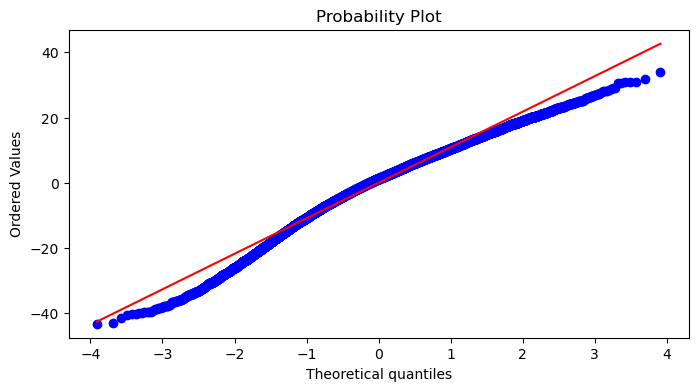

In [50]:
plt.figure(figsize=(8, 4))

probplot(results.resid, dist='norm', plot=plt)  #QQplot
plt.show()

In [51]:
X_user = data_clean_dummies['user_review']
X_ano = data_clean_dummies['ano']
X_nint = data_clean_dummies['empresa_Nintendo']
X_pc = data_clean_dummies['empresa_PC']
X_ps = data_clean_dummies['empresa_PlayStation']
X_xbox = data_clean_dummies['empresa_Xbox']

from statsmodels.formula.api import ols


#fit multiple linear regression model
model = ols('Y ~ X_user + X_ano + X_nint + X_pc + X_ps + X_xbox', data=X).fit()

#view model summary
print(model.summary())


from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     742.8
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:41:21   Log-Likelihood:                -57420.
No. Observations:               15040   AIC:                         1.149e+05
Df Residuals:                   15034   BIC:                         1.149e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -368.7191     23.520    -15.677      0.0

1.9842389417511226

<Figure size 1000x600 with 0 Axes>

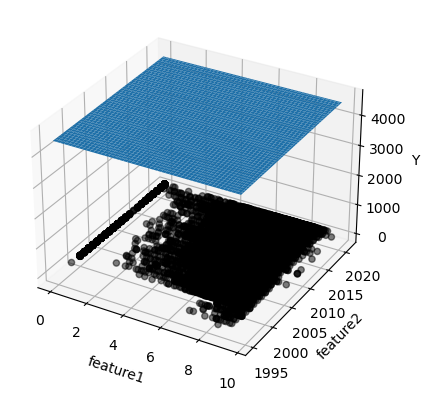

In [52]:

# Recupera os parâmetros calculados
beta0_hat = results.params[0]  # const
beta1_hat = results.params[1]  # meta
beta2_hat = results.params[2]  # 

# Define uma função que aplica aos parâmetros
def f (feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X['user_review']
feature2 = X['ano']
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

# Plota os pontos e o plano em 3D
plt.figure(figsize=(10, 6))
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="black", alpha=0.5)
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()

In [53]:
data_clean.meta_score.min()

20

In [54]:
# x_vec_2 = np.linspace(data_clean.meta_score.min(), data_clean.meta_score.max(), 2)
# y_vec_2 = beta0_final + beta1_final*x_vec_2

# plt.figure(figsize=(7,6))
# plt.plot(x_vec_2,y_vec_2, color="r") # resultados da regressão
# plt.scatter(data_clean['ano'], y_dados); # dados
# plt.xlabel("x: ano")
# plt.ylabel("y: meta_score")
# plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
# plt.show()

##### Valores de R^2 e RMS

In [55]:
R2 = 1 - (sum((data_clean_dummies['meta_score']- resultados)**2)/sum((data_clean_dummies['meta_score']-
                                                               (data_clean_dummies['meta_score'].mean()))**2))
RMS = math.sqrt(R2)
RMS

0.44508422321507096

In [56]:
len(resultados)

15040

In [57]:
len(data_clean_dummies['meta_score'])

15040

In [58]:
1 - sum((data_clean_dummies['meta_score'] - resultados)**2)/sum((data_clean_dummies['meta_score']-
                                                               data_clean_dummies['meta_score'].mean())**2)

0.19809996575496314

## Primeiro modelo: RANDOM FOREST REGRESSION
<div id="knn"></div>

Complementando e corrigindo um dos maiores defeitos do modelo  Árvore de decisão, as **Random Forest** ou **Florestas Aleatórias**, são um conjunto de algoritmos derivados das árvores de decisão, e suas principais características são destacadas pela flexibilidade, usabilidade, facilidade de uso e escolha de hiperparâmetros, estes muito próximos dos escolhidos para se avaliar uma Decision Tree, além de em geral terem resultados superiores a deste último, por se tratar, em termos técnicos de uma expansão.

In [59]:
# X_1 = data_clean[['ano', 'user_review']] 
# Y_1 = data_clean['meta_score']

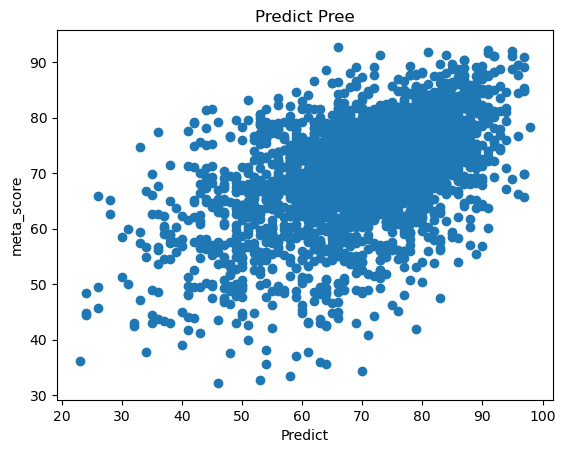

0.22251832963651663


In [60]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=42)

RRG = RandomForestRegressor()
RRG = RRG.fit(X1_train, y1_train)

predY = RRG.predict(X1_test)
r_tree = metrics.r2_score(y1_test, predY)

plt.figure()
plt.ylabel('meta_score')
plt.xlabel('Predict')
plt.title('Predict Pree')
plt.scatter(y1_test, predY)
plt.show()

print(r_tree)

In [61]:
forest= RandomForestClassifier().fit(X1_train,y1_train)
score_train_forest = forest.score(X1_train, y1_train)
score_test_forest = forest.score(X1_test, y1_test)

print(f" Score train dataset : {score_train_forest}\n Score test dataset: {score_test_forest}")

 Score train dataset : 0.37508311170212766
 Score test dataset: 0.03590425531914894


*Há um tamanho ideal de florestas?*

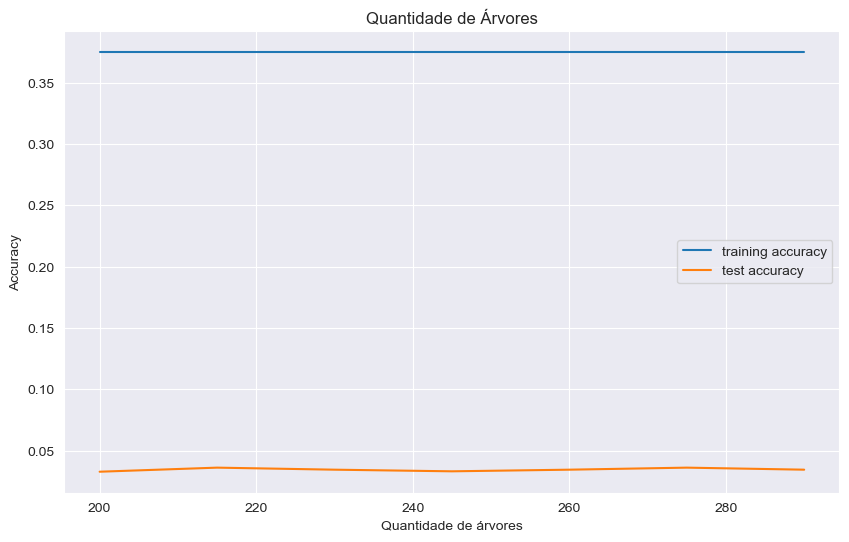

In [62]:
training_accuracy_forest = []
test_accuracy_forest = []

sns.set_style('darkgrid')

# Escolhendo uma faixa de árvores, sabendo que o número padrão é de 100 árvores :
n_estimators_max = np.arange(200,300,15)

for n in n_estimators_max:
    
    # Construindo o modelo:
    forest = RandomForestClassifier(n_estimators = n,criterion='entropy', random_state =0)
    forest =forest.fit(X1_train , y1_train)
    # Guardando os scores
    training_accuracy_forest.append(forest.score(X1_train , y1_train))
    test_accuracy_forest.append(forest.score(X1_test , y1_test))
    
    
    
plt.figure(figsize=(10,6))
plt.title('Quantidade de Árvores')
plt.plot(n_estimators_max , training_accuracy_forest , label = 'training accuracy')
plt.plot(n_estimators_max , test_accuracy_forest , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Quantidade de árvores")
# plt.scatter(275,max(test_accuracy_forest), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()


plt.show()

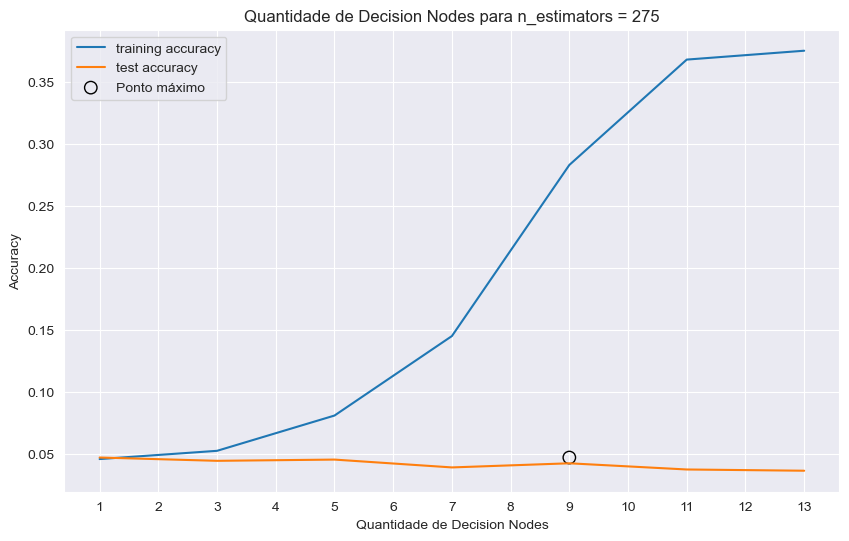

In [63]:
training_accuracy_forest = []
test_accuracy_forest = []

sns.set_style('darkgrid')

# Escolhendo uma faixa de profundidade:
max_depth = np.arange(1,15,2)

for n in max_depth:
    
    # Construindo o modelo:
    forest = RandomForestClassifier(n_estimators = 275, criterion='entropy', max_depth = n, random_state =0)
    forest =forest.fit(X1_train , y1_train)
    # Guardando os scores
    training_accuracy_forest.append(forest.score(X1_train , y1_train))
    test_accuracy_forest.append(forest.score(X1_test , y1_test))
    
    
    
plt.figure(figsize=(10,6))
plt.title('Quantidade de Decision Nodes para n_estimators = 275')
plt.plot(max_depth , training_accuracy_forest , label = 'training accuracy')
plt.plot(max_depth , test_accuracy_forest , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Quantidade de Decision Nodes")
plt.xticks(range(1,15,1))
plt.scatter(9,max(test_accuracy_forest), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()

plt.show()

## Segundo modelo: K-Nearest Neighbors Classifier
<div id="knn"></div>

O vizinho mais próximo (KNN) é um algoritmo de aprendizado de máquina muito simples, fácil de entender, versátil e um dos mais avançados. KNN é usado em uma variedade de aplicações, como finanças, saúde, ciência política, detecção de caligrafia, reconhecimento de imagem e reconhecimento de vídeo. Nas classificações de crédito, os institutos financeiros irão prever a classificação de crédito dos clientes. No desembolso do empréstimo, os institutos bancários irão prever se o empréstimo é seguro ou arriscado. Na ciência política, classificar eleitores em potencial em duas classes votará ou não. Algoritmo KNN usado para problemas de classificação e regressão. Algoritmo KNN baseado na abordagem de similaridade de recursos.

Considerando que o output que gostariamos  de prever é uma variável categórica que possui 4 possíveis valores (ou classes), devemos pensar em um algoritimo de classificação para um primeiro modelo.

O algorítimo K-NN é um dos algoritimo mais simples de machine learning. Portanto decidimos utiliza-lo como uma primeira tentativa de predição, avaliando seu desempenho e buscar melhores itereações que possam aumentar sua performance.

**Entendendo o modelo KNearest Neighbors Classification**

<br>


<center><b>Simples figuração do funcionamento deste modelo </b></center>

Para fazer uma predição de um novo ponto,  o algoritimo realiza a predição procurando o ponto no conjunto de treino mais próximo do novo dado. Em sua condição mais complexa , apenas o ponto mais próximo é considerado , nesse condição dizemos que o n_neighbors = 1 (número de vizinhos). Para a predição podem ser considerados k neighbors, esse "número de vizinhos" é um dos parâmetros que podem ser ajustados buscando obter melhores resultados de predição, quanto maior o valor n_neighbors, menor é a complexidade do modelo.

Os principais hiperparâmetros desse modelo são : n_neighbors , weights,  metric e p. A escolha desses hiperparâmetros é essencial para o aumento ou não da complexidade do modelo , isso sendo completamente relaciona a possibilidade de Underfitting ou Overfitting desse.Dessa forma a escolha desses hiperparâmetros se faz necessária para a construção de um modelo eficaz.

De maneira simplificada , o parâmetro **n_neighbors** , assim como a **metric** são os dois hiperparâmetros mais importantes do modelo. A escolha da metric (metrica) é um fato essencial , sendo ela relacionada ao calcula da distância do ponto de analise até os vizinhos maiz próximos. Em geral ela pode ser reduzida em dois casos principais , p = 1 (Manhattan) e p =2 (Euclidiano), sendo sua generalização (p>2) conhecida como a equação distância de Minkowski .

$$Manhattan = \sqrt{\sum_{i=1}^{k}\left | x_{i} - y_{i} \right |}$$



$$Euclidiano = \sqrt{\sum_{i=1}^{k}(x_{i}-y_{i})^{2}}$$


$$Minkowski =\left ( \sum_{i=1}^{k}(x_{i}-y_{i})^p \right )^\frac{1}{p}$$


Um outro hiperparâmetros  também fundamental para a predição funciona com a função de ponderação , **weights** ,  de importância para predição em relação a "vizinhança". Basicamente as duas formas mais comuns aplicadas a esse parâmetro são: "uniform" que basicamente deixa todos os pesos uniformizados independente da distância do ponto de analise, outra função de peso chama-se "distance" onde os pontos são ponderados pelo inverso da distância ao novo ponto.


#####  Aplicando o Modelo na prática

Feita a familiarização matemática e teórica com o algoritmo, faz-se necessário o entendimento desse modelo segundo a [Biblioteca utilizada](#sklearn), isto é, seus principais hiper parâmetros, comportamento e como evitar comportamentos anômalos como Overfitting e Underfitting.

Os principais hiperparâmetros de KNeighborsClassifier para esse modelo são dispostos em:

`n_neighbors` : **int , default=5**

Número de "vizinhos" utilizados para realizar a classificação.


`weights` : **{'uniform', 'distance'} or callable, default='uniform'**

Peso utiliazdo na função de predição. Valores possíveis:

* uniform : Pesos uniformes dados a cada ponto considerado "vizinho".


* distance : Pesos dados pelo inverso da distância. Vizinhos mais próxios com maiores pesos atribuidos. 


* callable :  definida pelo usuário que recebe uma matriz de distâncias e retorna uma matriz contendo os pesos.


`p` : **{int, padrão = 2}**

Parâmetro de potência para a métrica Minkowski. 

* $p = 1$ $\rightarrow$ manhattan_distance (l1) 


* $p =2$ $\rightarrow$ euclidean_distance (l2)


* $p > 2$ $\rightarrow$ minkowski_distance (l_p).


In [64]:
knn= KNeighborsClassifier().fit(X1_train,y1_train)

score_train = knn.score(X1_train, y1_train)
score_test = knn.score(X1_test, y1_test)

print(f" Score train dataset : {score_train}\n Score test dataset: {score_test}")

 Score train dataset : 0.2230718085106383
 Score test dataset: 0.0269281914893617


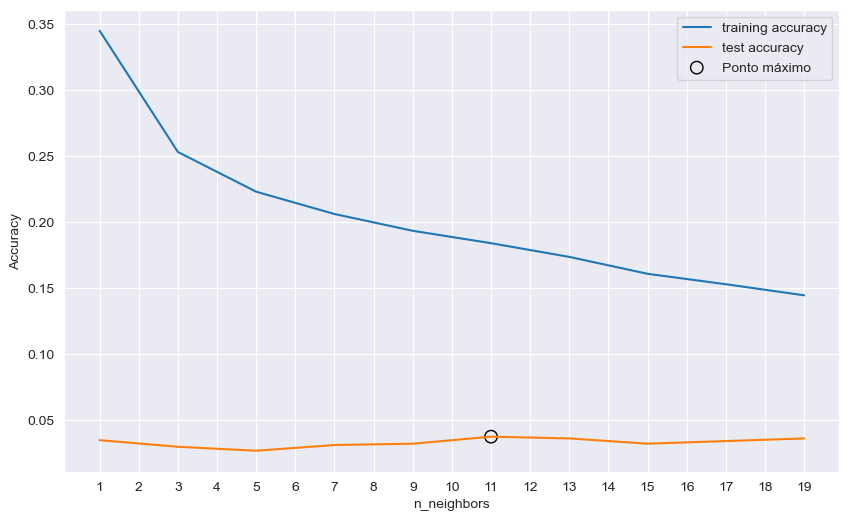

In [65]:
plt.figure(figsize=(10,6))

training_accuracy = []
test_accruacy = []

# Escolhendo uma faixa de neighbors :
neighbors_settings = np.arange(1,20,2)

for n in neighbors_settings:
    
    # Construindo o modelo:
    
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X1_train , y1_train)
    
    # Guardando os scores
    training_accuracy.append(knn.score(X1_train , y1_train))
    test_accruacy.append(knn.score(X1_test , y1_test))
    
plt.plot(neighbors_settings , training_accuracy , label = 'training accuracy')
plt.plot(neighbors_settings , test_accruacy , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(range(1,20,1))
plt.scatter(11,max(test_accruacy), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()
plt.show()

In [66]:
n_neighbors = np.arange(1,27,3)

inicio = time.time()     # Inicio tempo de execução

knn_max_train=0
knn_max_test=0
n_max=0
p_max = 0
weights_better = 0

for n in n_neighbors:
    
    for p in [1,2,3]:
        
        for w in ['uniform', 'distance']:
        
            # Instanciando o modelo sem settar nenhum hiperparâmetro
            knn= KNeighborsClassifier(n_neighbors=n,p=p,weights=w,metric='minkowski').fit(X1_train,y1_train)
            
            #Evitando overfitting
            if knn.score(X1_test,y1_test)>knn.score(X1_train,y1_train):
                if knn.score(X1_test,y1_test)>knn_max_test:
                    knn_max_train=knn.score(X1_train,y1_train)
                    knn_max_test=knn.score(X1_test,y1_test)
                    n_max=n
                    p_max = p
                    weights_better = w
                else:
                    continue
            else:
                continue
                
fim = time.time()  #Fim - tempo de execução                
        
print(f"""O melhor número de vizinhos é {n_max}, com p_minkowski={p_max} e função_weight={weights_better} com valor de
scores:\ntraining:\t{knn_max_train:.3f}\ntest:\t\t{knn_max_test:.3f}""")

O melhor número de vizinhos é 0, com p_minkowski=0 e função_weight=0 com valor de
scores:
training:	0.000
test:		0.000


## Terceiro modelo : Logistic Regression
<div id="logistica"></div>

**Você sabe o que é uma regressão?**

Um modelo de regressão tem , principal objetivo verificar como certas variáveis de interesse influenciam a variável que queremos prever Y. Dito isto, busca-se criar um modelo matemático linearmente dependente para predição dos valores de Y com base em novos valores de variáveis preditoras X.


**Um pouco sobre Regressão Linear**

Em nosso segundo modelo utilizaremos um algorítimo de Regressão Logística. Para entendermos melhor seu funcionamento é fundamental conhecermos o modelo do qual o mesmo derivou, a Regressão Linear.

Regressão Linear é um método estatístico utilizado para investigar a relação existente entre uma ou mais variáveis com outra que deseja-se prever através da soma de seus pesos, e do acrésimo de um termo independente. Como formula para o modelo de Regressão Linear temos:

<br>
$$\widehat{y} = \Theta _0 + \Theta _1 x_1 +\Theta _2 x_2 + ... + \Theta _n x_n $$
<br>

Onde , $\widehat{y}$ é a variável que desejamos prever (target) , $\Theta _n$  é o peso da feature $x_n$ e $\Theta _0$ é o termo independente (intercepto).

Como exemplo de uma regressão linear temos o preço de venda de uma casa , que pode está associado a caracteristicas como tamanho da casa, número de quartos , localidades etc.

Cada predição realizada pelo modelo agrega consigo um erro associado. Em um modelo de Regressão Linear buscamos o melhor ajuste de pesos que esteja associado ao menor erro de predição. Várias métricas podem ser utilizadas objetivando minimizar esse erro, como as mais utilizadas podemos citar:

* Mean Absolute Error  (MAE): A média do erro que cada ponto tem em relação a linha de regressão. 

<br>
$$\frac{1}{n} \sum_{j=1}^{n} \left | y_j - \widehat{y}_j \right |$$
<br>

* Mean Squared Error (MSE): Soma acumulativa dos erros quadrados. Por estarem elevados ao quadrado, há uma penalização em erros maiores.

<br>
$$\frac{1}{n} \sum_{j=1}^{n} \left | y_j - \widehat{y}_j \right |^2 $$
<br>

Onde, y representa o valor real observado e $\widehat{y}$ o previsto pelo modelo.


* Median Absolute Deviation (MAD): Nesse método , primeiro ocorre a ordenação dos elementos, posteriromente pegamos o erro que divide o conjunto simetricamente, por exemplo , imagine o conjunto de erros observados [1,3,6,2,10], ordenando temos [1, 2, 3 ,6 , 10] o elemento que divide esse conjunto no meio é o 3. Essa métrica ignora pontos mais extremos e privilegia manter a forma geral da distribuição.

Caso tenha mais interesse sobre Regressão Linear [clique aqui](https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8).

**Regressão Logística**

A Regressão Logística é um modelo que estima a probabilidade de ocorrência ou não de um evento a partir de um conjunto de variáveis preditoras.

Após o ajuste do modelo de Regressão Linear , passamos os valores previstos obtidos por esse modelo e o colocamos em uma função que retornará a probabilidade de um valor pertencer a determinada classe. 

<br><br>
<center>
    <img src="firewall_assets/logVSlinear.png" width=600 style="float: center; margin: 0px 0px 10px 10px">
    <br><img src="firewall_assets/LogReg_1.png" width=600 style="float: center; margin: 0px 0px 10px 10px">
</center>


<center><b>Comportamento de uma Regressão Linear e uma Regressão Logistica Simples.</b></center>
<br>

Em uma Regressão Logística Simples, temos com saída valores binário, ou seja, retornando a probabilidade de pertencer a uma classe 0 ou uma classe 1. Para probabilidades inferiores a 0.5 , o target é classificado como classe 0 e para probabilidades superiores a 0.5 o target é classificado como classe 1.

**Função Sigmoide**

Após acharmos a reta que melhor se adequa aos dados, vamos "achatar" a transformação linear de forma que o valor previsto pelo modelo possa ser interpretado como uma probabilidade, no modelo binário, 0 ou 1. Uma das funções de ativação mais utilizadas para esse "achatamente" é chamada de função logística, ou sigmóide.

<br>
$$h_\theta(\widehat{y}) = \frac{1}{1 + e^{-\widehat{y}}}$$
<br>

Onde $\widehat{y}$ é o output do modelo linear e $e$ o expoente de Euler.

Matematicamente a regra de decisão tomada através da probabilidade obtida pela função sigmoide pode ser representada como:

<br>

$$ h_\theta(x)= P(Y=1 | X; \theta)$$

<br>

$$P(Y=1 | X; \theta) + P(Y=0 | X; \theta) = 1$$

$$P(Y=0 | X; \theta) = 1 - P(Y=1 | X; \theta)$$

<br>

$$P(Y=0 | X; \theta) = 1 - h_\theta(x)$$

Onde , 

`P(Y=1 | X; theta)` a probabilidade de ser classificado como classe 1 , dado que a regressão linear (X) foi parametrizada com peso $\theta$.

`P(Y=0 | X; theta)` a probabilidade de ser classificado como classe 0 , dado que a regressão linear (X) foi parametrizada com peso $\theta$.


**Função de Custo**

Como mostrado anteriormente, o modelo de Regressão Linear possui o calculo de uma função de custo ,comumentemente se utiliza o MSE , que busca minimizar os erros cometidos pelo modelo por meio de ajuste de parâmetros. A regressão logística possui uma função de custo não convexa de parâmetros (teta) da forma :

<br>
$$Cost(h{_{\Theta}}(x)), y) = -y\ln (h{_{\Theta}}(x)) - (1-y)\ln(1-h{_{\Theta}}(x))$$
<br>
Onde,
<br>

* `y=1` : $Cost(h{_{\Theta}}(x)), y) = -y\ln (h{_{\Theta}}(x))$

* `y=0` : $Cost(h{_{\Theta}}(x)), y) = - \ln(1-h{_{\Theta}}(x))$
<br>

Caso deseje entender um pouco mais sobre funções de custo e modelos de regressão logística [clique aqui](#https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

Para modelos de multiclasses , a divisão de probabilidade é mais segmentada, assim funções tais como tangente hiperbolica e RELU possuem um melhor desempenho para esse tipo de classificação.
<br><br>
$$\tanh (x)  = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$
<br><br>
$$f(x) = \left\{\begin{matrix}
 max(0,x)& , x>0\\ 
 0 & , x<0
\end{matrix}\right.$$
<br>

Concluindo , podemos afirmar que minimizar a função de custo é o objetivo do modelo de regressão logística, quando o seu menor valor é alcançado foram encontrados os melhores valores para a predição.


**Regularization**

A regularização é uma forma de evitar ajuda a resolver problemas de ajuste excessivo, o que implica que o modelo tenha um bom desempenho nos dados de treinamento, mas tenha um desempenho ruim nos dados de validação (teste). Dessa forma, a regularização penaliza coeficientes de regressão de alto valor ,consequentemente, penalizando os modelos mais complexos, reduzindo parâmetros e simplificando o modelo, mas sem reduzir o seu poder preditivo. 

Existem diversos tipos de regularização , e ambas diminuem  penalizam grandes pesos de coeficiente, mas a maneira como os pesos diminuem é diferente. Algumas das principais regularizações utilizadas são: 

* `Função L1 Loss ou Regularização L1`: adiciona um termo de penalidade que é igual  à soma dos valores absolutos dos coeficientes. Isso também é conhecido como o método de menor desvio absoluto. Simplificando , os coeficientes passam a ter uma limitação de tamanho. Alguns coeficientes podem ter seu coeficiente reduzido a zero e serem eliminados.


* `L2 Loss function ou L2 Regularization` : adiciona um termo de penalidade que é igual à soma dos quadrados dos coeficientes. Simplificando , podemos dizer que todos os coeficientes são reduzidos pelo mesmo fator (nenhum é eliminado).
 

* `Elastic Net`:  É uma combinação das regularizações L1 e L2 simultaneamente, juntamente com a adição de um hiperparÂmetro. Normalmente utilizada quando estamos lidando com variáveis altamente correlacionaveis.

#####  Aplicando o Modelo na prática

Feita a familiarização matemática e teórica com o algoritmo, faz-se necessário o entendimento desse modelo segundo a [Biblioteca utilizada](#sklearn), isto é, seus principais hiper parâmetros, comportamento e como evitar comportamentos anômalos como Overfitting e Underfitting.

Os principais hiperparâmetros de LogisticRegression para esse modelo são dispostos em:

`solver` : **{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’}** 

*Algoritimo usado para a otimizaçao do problema*.


`penalty`: **{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}**

*Usada para expecificar a norma de penalização utilizada*. 


`C`: **float, default=1.0**

*O inverso da força da regularização*. 

`random_state` **{default=“none",int}**

*Controla a aleatoriedade de seleção das porções segmentadas pelo modelo do dataset. Fixando um valor, mantem-se a mesma partição*.

In [67]:
log= LogisticRegression(random_state = 0).fit(X1_train,y1_train)

score_train = log.score(X1_train, y1_train)
score_test = log.score(X1_test, y1_test)

print(f" Score train dataset : {score_train}\n Score test dataset: {score_test}")

 Score train dataset : 0.04321808510638298
 Score test dataset: 0.043882978723404256


In [68]:
# Variando o parâmetro C , valor que controla a força da parametrização.

log_score_train = list()
log_score_test = list()

C=''

parametro_C = np.arange(1,100,10)

inicio = time.time()     # Inicio tempo de execução

for c in parametro_C:
    
    # Criando e ajustando modelo
    log=LogisticRegression(penalty='l2', C=c, random_state=0).fit(X1_train, y1_train)
    
    # Calculando Score de treino e teste
    
    log_score_train.append(log.score(X1_train,y1_train))
    log_score_test.append(log.score(X1_test,y1_test))
    
    C=c

fim = time.time()     # Inicio tempo de execução
    
# Maiores valores de acerto encontrados na lista treino e teste.

print(f'Maior Score train obtido : {max(log_score_train)} \nMaior Score test obtido: {max(log_score_test)}')

Maior Score train obtido : 0.04321808510638298 
Maior Score test obtido: 0.043882978723404256


In [69]:
count=0

for i in range(len(log_score_test)):
        
    if(log_score_train[i] < log_score_test[i]):
        
        count+=1
    
    else:
        
        continue
        
print(f'Existe {count} valores de acurácia teste que superam a acurácia treino.')

Existe 1 valores de acurácia teste que superam a acurácia treino.


In [70]:
minimo = 100000

for i in range(len(log_score_test)):
        
    if(abs(log_score_train[i] - log_score_test[i]) < minimo):
        
        minimo = abs(log_score_train[i] - log_score_test[i])
        index = i 

# Considerando o menor valor entre a diferença score treino e teste, como melhor arranjo para a predição de modelo , 
# temos que para os valor:

print(f'Temos o melhor arranjo , para C = {parametro_C[index]}.\nScore Treino : {log_score_train[index]} \nScore Teste: {log_score_test[index]}')

Temos o melhor arranjo , para C = 11.
Score Treino : 0.04263630319148936 
Score Teste: 0.0425531914893617


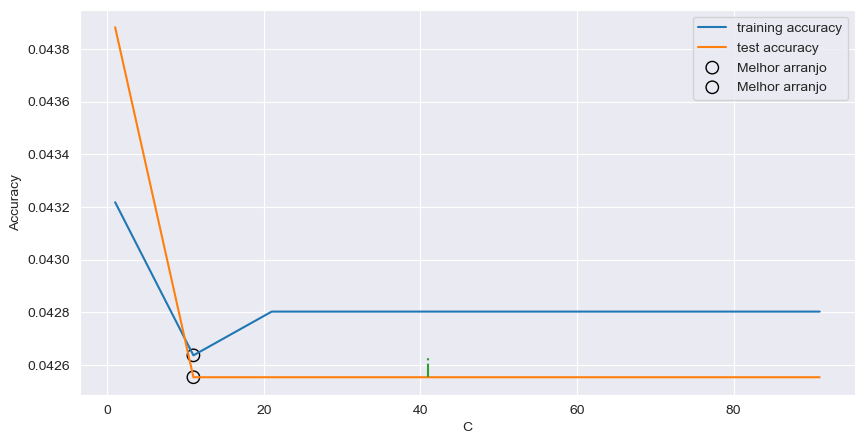

In [71]:
plt.figure(figsize=(10,5))

linha_y = np.linspace(log_score_test[index] , log_score_train[index] , 10)
valor_x = [41 for i in range(len(linha_y))]

plt.plot(parametro_C , log_score_train , label = 'training accuracy')
plt.plot(parametro_C , log_score_test , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("C")

plt.plot(valor_x , linha_y , '-.')
# plt.text(28, 0.978, 'Min(Train-Test)')

plt.scatter(11, log_score_test[index] , s=80 , facecolors='None', edgecolors='black' , label='Melhor arranjo')
plt.scatter(11, log_score_train[index] , s=80 , facecolors='None', edgecolors='black' , label='Melhor arranjo')

plt.legend(loc = 'best')
plt.show()

## Quarto modelo: Decision Tree

In [72]:
tree= DecisionTreeClassifier().fit(X1_train,y1_train)

score_train_tree = tree.score(X1_train, y1_train)
score_test_tree = tree.score(X1_test, y1_test)

print(f" Score train dataset : {score_train_tree}\n Score test dataset: {score_test_tree}")

 Score train dataset : 0.37508311170212766
 Score test dataset: 0.027925531914893616


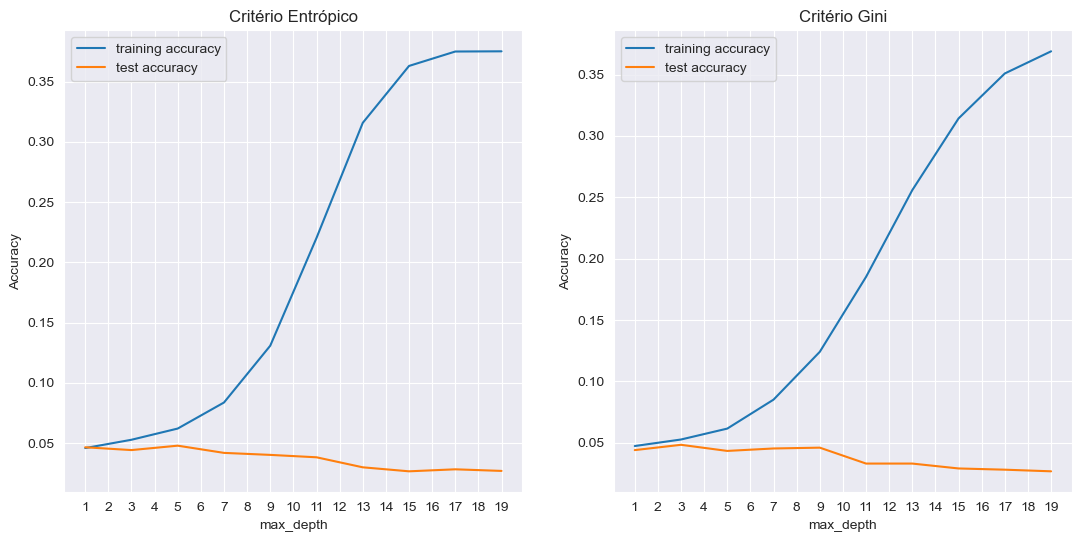

In [73]:
plt.figure(figsize=(13,6))

training_accuracy_entropy = []
test_accruacy_entropy = []

training_accuracy_gini = []
test_accruacy_gini = []

# Escolhendo uma faixa de neighbors :
max_depth_settings = np.arange(1,20,2)

for n in max_depth_settings:
    
    # Construindo o modelo:
    tree_entropy = DecisionTreeClassifier(max_depth = n,criterion='entropy')
    tree_entropy.fit(X1_train , y1_train)
    
    tree_gini = DecisionTreeClassifier(max_depth = n,criterion='gini')
    tree_gini.fit(X1_train , y1_train)
    
    # Guardando os scores
    training_accuracy_entropy.append(tree_entropy.score(X1_train , y1_train))
    test_accruacy_entropy.append(tree_entropy.score(X1_test , y1_test))
    
    training_accuracy_gini.append(tree_gini.score(X1_train , y1_train))
    test_accruacy_gini.append(tree_gini.score(X1_test , y1_test))
    
plt.subplot(121)    
plt.title('Critério Entrópico')
plt.plot(max_depth_settings , training_accuracy_entropy , label = 'training accuracy')
plt.plot(max_depth_settings , test_accruacy_entropy , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.xticks(range(1,20,1))
#plt.scatter(12,max(test_accruacy), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()

plt.subplot(122)    
plt.title('Critério Gini')
plt.plot(max_depth_settings , training_accuracy_gini , label = 'training accuracy')
plt.plot(max_depth_settings , test_accruacy_gini , label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.xticks(range(1,20,1))
#plt.scatter(12,max(test_accruacy), s=80 , facecolors='None', edgecolors='black' , label='Ponto máximo')
plt.legend()

plt.show()

In [74]:
inicio = time.time()     # Inicio tempo de execução

train_score_tree=0
test_score_tree=0
max_depth1=0
criterion_best =''
splitter_best = ''
for i in range(1,37):
    for criterion in ['gini','entropy']:
        for splitter in ['random','best']:
            
            tree=DecisionTreeClassifier(criterion=criterion,splitter=splitter,
                                        max_depth=i,random_state=0).fit(X1_train,y1_train)
            train_score=tree.score(X1_train,y1_train)
            test_score=tree.score(X1_test,y1_test)
            #Evitando parte de Overffiting
            if test_score>train_score:
                if test_score>test_score_tree:
                    test_score_tree=test_score
                    max_depth1=i
                    train_score_tree=train_score
                    criterion_best = criterion
                    splitter_best = splitter
                else:
                    continue
            else:
                continue
fim = time.time()  #Fim - tempo de execução    

print(f'''O Melhor valor para "max_depth" é {max_depth1}, com critério "{criterion_best}"
e Spliter "{splitter_best}":\n 
(training):\t{train_score_tree}\n (test):\t{test_score_tree}''')

print(f'O Tempo de execução foi de {fim-inicio}s')

O Melhor valor para "max_depth" é 2, com critério "gini"
e Spliter "best":
 
(training):	0.049867021276595744
 (test):	0.05053191489361702
O Tempo de execução foi de 3.014925718307495s


## CONCLUSÕES FINAIS:

In [75]:
knearest = KNeighborsClassifier(n_neighbors = 13 , p = 2 , weights = 'uniform', 
                                metric = 'minkowski').fit(X1_train,y1_train)
 
logistic = LogisticRegression(penalty='l2', C=41, random_state=0).fit(X1_train,y1_train)

arvore = DecisionTreeClassifier(criterion='entropy',splitter='random',
                                        max_depth=12,random_state=0).fit(X1_train,y1_train)

floresta = RandomForestClassifier(n_estimators = 275,criterion='gini',
                                        max_depth=7,random_state=0).fit(X1_train,y1_train)

In [76]:
scoring_metrics = ['accuracy','f1_micro','f1_macro','f1_weighted']
knn_acc = cross_val_score(knearest,X,Y,cv=10,scoring = 'accuracy')
log_acc = cross_val_score(logistic,X,Y,cv=10,scoring = 'accuracy')
arv_acc = cross_val_score(arvore,X,Y,cv=10,scoring = 'accuracy')
flo_acc = cross_val_score(floresta,X,Y,cv=10,scoring = 'accuracy')

knn_mic = cross_val_score(knearest,X,Y,cv=10,scoring = 'f1_micro')
log_mic = cross_val_score(logistic,X,Y,cv=10,scoring = 'f1_micro')
arv_mic = cross_val_score(arvore,X,Y,cv=10,scoring = 'f1_micro')
flo_mic = cross_val_score(floresta,X,Y,cv=10,scoring = 'f1_micro')

knn_mac = cross_val_score(knearest,X,Y,cv=10,scoring = 'f1_macro')
log_mac = cross_val_score(logistic,X,Y,cv=10,scoring = 'f1_macro')
arv_mac = cross_val_score(arvore,X,Y,cv=10,scoring = 'f1_macro')
flo_mac = cross_val_score(floresta,X,Y,cv=10,scoring = 'f1_macro')


scores = {'Modelo':['KNNeighbors','Logistic Regression','Decision Tree','Random Forests'],
         'Média da acurácia':[knn_acc.mean(),log_acc.mean(),arv_acc.mean(),flo_acc.mean()],
         'Desvio Padrão da acurácia':[knn_acc.std(),log_acc.std(),arv_acc.std(),flo_acc.std()],
         'Média da métrica ponderada Micro':[knn_mic.mean(),log_mic.mean(),arv_mic.mean(),flo_mic.mean()],
         'Desvio Padrão da métrica ponderada Micro':[knn_mic.std(),log_mic.std(),arv_mic.std(),flo_mic.std()],
         'Média da métrica ponderada Macro':[knn_mac.mean(),log_mac.mean(),arv_mac.mean(),flo_mac.mean()],
         'Desvio Padrão da métrica ponderada Macro':[knn_mac.std(),log_mac.std(),arv_mac.std(),flo_mac.std()]}
df = pd.DataFrame(scores)
df

,Modelo,Média da acurácia,Desvio Padrão da acurácia,Média da métrica ponderada Micro,Desvio Padrão da métrica ponderada Micro,Média da métrica ponderada Macro,Desvio Padrão da métrica ponderada Macro
0,KNNeighbors,0.036835,0.005169,0.036835,0.005169,0.022631,0.005568
1,Logistic Regression,0.043617,0.002527,0.043617,0.002527,0.003426,0.000493
2,Decision Tree,0.035372,0.005044,0.035372,0.005044,0.021416,0.006103
3,Random Forests,0.044082,0.002710,0.044082,0.002710,0.019991,0.004472


In [77]:
RMS, R2

(0.44508422321507096, 0.19809996575496314)

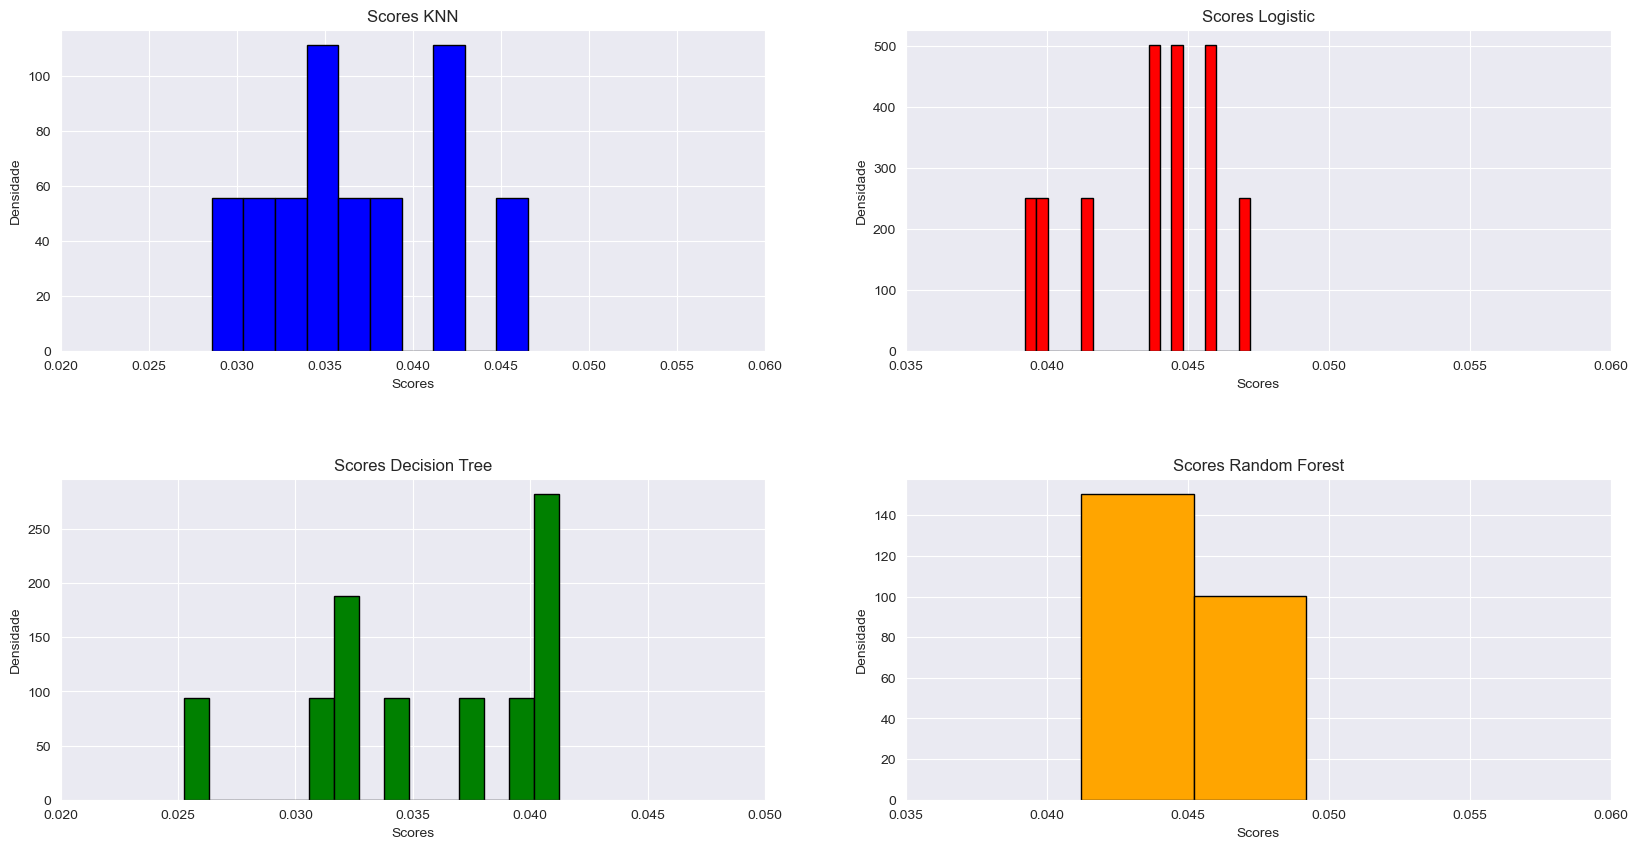

In [78]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('Scores KNN')
plt.hist(knn_acc,bins=10,density=1,color='blue',edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Densidade')
plt.xlim([0.02,0.06])

plt.subplot(222)
plt.title('Scores Logistic')
plt.hist(log_acc,bins=20,density=1,color='red',edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Densidade')
plt.xlim([0.035,0.06])

plt.subplot(223)
plt.title('Scores Decision Tree')
plt.hist(arv_acc,bins=15,density=1,color='green',edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Densidade')
plt.xlim([0.02,0.05])

plt.subplot(224)
plt.title('Scores Random Forest')
plt.hist(flo_acc,bins=2,density=1,color='orange',edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Densidade')
plt.xlim([0.035,0.06])

plt.subplots_adjust(hspace = 0.4)

plt.show()

In [79]:
# Ações realizadas para não ser necessário rodar o jupyter por completo:
dados_interativos = data_clean.copy()

# Realizando codificação 
transformer = LabelEncoder()
data_clean.empresa = data_clean.iloc[:,[6]].apply(lambda x: transformer.fit_transform(x))
# data_clean.empresa = data_clean.iloc[:,[6]].apply(lambda x: transformer.fit_transform(x))
y = data_clean.empresa
dados_interativos = dados_interativos.drop('empresa',axis=1)
dados_interativos = dados_interativos.drop('name',axis=1)
dados_interativos = dados_interativos.drop('platform',axis=1)
dados_interativos = dados_interativos.drop('release_date',axis=1)
dados_interativos = dados_interativos.drop('summary',axis=1)
dados_interativos = dados_interativos.drop('meta_score',axis=1)

# Realizando divizão
X1_train,X1_test,y1_train,y1_test=train_test_split(dados_interativos,y, random_state=42,test_size=0.15)

model = {'KNN': KNeighborsClassifier(n_neighbors = 13 , p = 2 , weights = 'uniform', 
                                metric = 'minkowski').fit(X1_train,y1_train), 
        'Logistic Regression': LogisticRegression(penalty='l2', C=11, 
                                                  random_state=0).fit(X1_train,y1_train), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',splitter='random',
                                        max_depth=2,random_state=0).fit(X1_train,y1_train),
        'Random Forest': RandomForestClassifier(n_estimators = 200,criterion='gini',
                                        max_depth=9,random_state=0).fit(X1_train,y1_train)}

anos = np.arange(1995, 2022)



@interact( Modelo = list(model.keys()),Ano = anos, User_review = (0, 100,1))
def f(Modelo = 'KNN', Ano = 1995 ,
     User_review=10):
    
    
    X = np.array([Ano, User_review]).reshape(1,-1)
    

    resultado = model[Modelo].predict(X)
    
    true = {'0' : ['Nintendo','green'] , '1' : ['PC','red'] , '2' : ['Play Station','yellow'] , '3' : ['Xbox','purple']}   
    
    return md('## <center> O A plataforma preponderante é <span style="color:{1}">{0}</span></center>'
              .format(true[str(resultado[0])][0],true[str(resultado[0])][1]))

interactive(children=(Dropdown(description='Modelo', options=('KNN', 'Logistic Regression', 'Decision Tree', '…

In [80]:
data_clean.empresa = data_clean.iloc[:,[6]].apply(lambda x: transformer.fit_transform(x))